# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [407]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [408]:
pd.__version__

'1.3.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [409]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [410]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [411]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [412]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [413]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [414]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [415]:
len(movies)

244914

### List all Batman movies ever made

In [416]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [417]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [418]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [419]:
Harry_Potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter:', len(Harry_Potter_df))
Harry_Potter_df.head(10)
Harry_Potter_df.sort_values(by="year",ascending=False)


Total Harry Potter: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [458]:
print('movies made in 2017 =',len(movies[movies.year == 2017]))

movies made in 2017 = 11474


### Section I - Q2 : How many movies were made in the year 2015?

In [460]:
print('Number of movies made in 2015 =',len(movies[movies.year == 2015]))

Number of movies made in 2015 = 8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [465]:
print('movies made from 20000 till 2018 =',len(movies[movies.year>=2000])-len(movies[movies.year>2018]))

movies made from 20000 till 2018 = 114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [466]:
Hamlet_df = movies[movies.title.str.fullmatch('Hamlet', case=False)]
print('Number of movies titled "Hamlet" =',len(Hamlet_df))

Number of movies titled "Hamlet" = 20


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [424]:
Hamlet_df[Hamlet_df["year"]>=2000].sort_values(by="year",ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [425]:
Inception_df = cast[cast.title.str.fullmatch('Inception', case=False)]
print('supporting cast=',Inception_df['n'].isna().sum())


supporting cast= 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [426]:
print('main cast=',Inception_df['n'].notna().sum())


main cast= 51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [427]:
# Inception_df.sort_values(["n"],ascending=False)
Inception_df.nlargest(10,"n")["name"]

3731263        Shannon Welles
833376            Jack Gilroy
2250605         Jason Tendell
3473041    Lisa (II) Reynolds
1812091        Andrew Pleavin
2049179           Felix Scott
807795         Michael Gaston
149008           Peter Basham
3444628        Nicole Pulliam
3203564     Alex (II) Lombard
Name: name, dtype: object

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

Part(A) All movies where there was a character 'Albus Dumbledore'

In [428]:
movies_Dumbledore = cast[cast.character.str.fullmatch('Albus Dumbledore', case=False)]
print('movies with Albus Dumbledore=',movies_Dumbledore.title)

movies with Albus Dumbledore= 704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object


Part(B) only the actors who played the character 'Albus Dumbledore'

In [429]:
print(movies_Dumbledore.drop_duplicates(subset='name')["name"])


704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

Part (A)  Number of roles 'Keanu Reeves' Played througout his career

In [430]:
movies_Reeves = cast[cast.name.str.fullmatch('Keanu Reeves', case=False)]
print('number of movies with Keanu Reeves=',len(movies_Reeves))

number of movies with Keanu Reeves= 62


Part (B) Leading roles that 'Keanu Reeves' played on or after 1999 in order by year

In [431]:
df_movie_Reeves_1999_and_on = movies_Reeves[movies_Reeves["year"]>=1999].sort_values(by='year',ascending=True).dropna()
df_movie_Reeves_1999_and_on[df_movie_Reeves_1999_and_on["n"]<10].character

1892390                     Neo
1892387        Donnie Barksdale
1892398                 Griffin
1892397             Shane Falco
1892383             Nelson Moss
1892358           Conor O'Neill
1892379           Julian Mercer
1892348        John Constantine
1892388              Alex Wyler
1892343              Bob Arctor
1892382    Detective Tom Ludlow
1892385                  Klaatu
1892359             Henry Torne
1892342                     Kai
1892368             Donaka Mark
1892361               John Wick
1892366                    Evan
1892393                    Hank
1892353        Detective Galban
1892399                  Ramsey
1892384               The Dream
1892362               John Wick
1892378              Lucas Hill
Name: character, dtype: object

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [432]:
cast_1950_to_1960 = cast[(cast["year"]<=1960) & (cast["year"]>=1950)]
print('Total number of actor and actress from 1950-1960=',len(cast_1950_to_1960.drop_duplicates("name")))

Total number of actor and actress from 1950-1960= 55516


In [433]:
cast_2007_to_2017 = cast[(cast["year"]<=2017) & (cast["year"]>=2007)]
print('Total number of actor and actress roles from 2007-2017=',len(cast_2007_to_2017.drop_duplicates("name")))

Total number of actor and actress roles from 2007-2017= 791489


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

(A) Total number of leading roles available from 2000 to present

In [434]:
cast_2000_to_present = cast[(cast["year"]>=2000)&(cast["n"].notna())&(cast["n"]<10)]
print('Total number of leading roles from 2000 to present=',len(cast_2000_to_present.drop_duplicates("name")))

Total number of leading roles from 2000 to present= 214591


(B) Total number of non-leading roles available from 2000 - present (exclude support cast)

In [435]:
df2_cast_2000_to_present = cast[(cast["year"]>=2000)&(cast["n"].notna())&(cast["n"]>=10)]
print('Total number of non-leading roles from 2000 to present=',len(df2_cast_2000_to_present.drop_duplicates("name")))

Total number of non-leading roles from 2000 to present= 439817


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [436]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

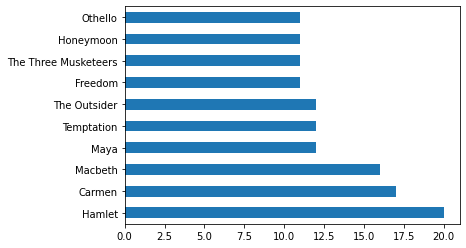

In [437]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [438]:
release_dates_2000_after = release_dates[release_dates['year']>=2000]
print(len(release_dates_2000_after))
df1 = release_dates_2000_after.groupby('year').count()
df1.sort_values(by='title',ascending=False).head(3)


226773


,title,country,date
year,,,
2016,17548,17548,17548
2014,17519,17519,17519
2015,16639,16639,16639


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:xlabel='century'>

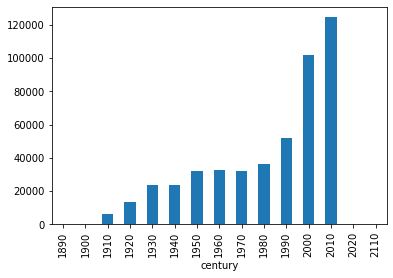

In [470]:
release_dates["century"] = (release_dates["year"]/10).astype(int)*10

release_dates.groupby('century').size().plot(kind='bar')


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

(A)

In [472]:

print('top 10 most common character names in movie history:')
print(cast.groupby("character").size().sort_values(ascending = False).head(10))

top 10 most common character names in movie history:
character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
dtype: int64


(B)

In [473]:

print('top 10 people most often credicted as herself in movie history:')
df3 = cast[cast.character.str.fullmatch("herself",case=False)]
print(df3.groupby("name").size().sort_values(ascending=False).head(10))


top 10 people most often credicted as herself in movie history:
name
Queen Elizabeth II        12
Joyce Brothers             9
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Marta Berrocal             6
Oprah Winfrey              6
Marilyn Monroe             6
dtype: int64


(C)

In [474]:
print('top 10 people most often credicted as himself in movie history:')
df4 = cast[cast.character.str.fullmatch("himself",case=False)]
print(df4.groupby("name").size().sort_values(ascending=False).head(10))

top 10 people most often credicted as himself in movie history:
name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [475]:
print('top 10 most frequent roles that start with the word "Zombie"')
df5 = cast[cast.character.str.startswith("Zombie")]
print(df5.groupby("name").size().sort_values(ascending=False).head(10))

top 10 most frequent roles that start with the word "Zombie"
name
John (II) Migliore    9
Colin Murtagh         7
S. William Hinzman    4
Clive McKenzie        4
Josephine Streiner    3
Roy Martin Thorn      3
John (XVIII) Cross    3
Richard Ricci         3
Terry Gindele         3
Ross Harris           3
dtype: int64


In [476]:
print('top 10 most frequent roles that start with the word "Police"')
df6 = cast[cast.character.str.startswith("Police")]
print(df6.groupby("name").size().sort_values(ascending=False).head(10))

top 10 most frequent roles that start with the word "Police"
name
Brick Sullivan    93
Chuck Hamilton    82
Lee Phelps        76
Frank O'Connor    72
Wade Boteler      70
Robert Homans     69
Dick Rush         68
Edgar Dearing     59
Jagdish Raj       58
James Flavin      57
dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:xlabel='year'>

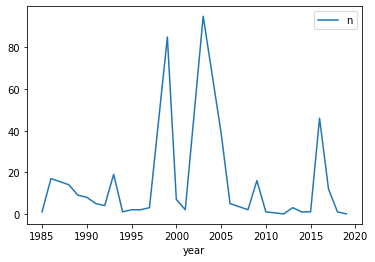

In [445]:
movies_Reeves.groupby("year").sum().plot()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


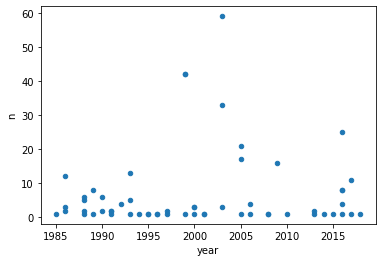

In [446]:
df7 = movies_Reeves[["year","n"]]
df7.plot(x="year",y="n",kind="scatter")
#plt.plot(df7["year"],df7["n"],kind='scatter')
plt.show()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/var/folders/_k/_7k3jtrn6fq06zz95lsdnk7h0000gn/T/ipykernel_34778/2267679053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hamlet_df["dc"] = (Hamlet_df["year"]/10).astype(int)*10


<AxesSubplot:xlabel='dc'>

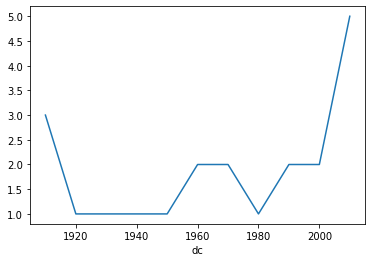

In [447]:
Hamlet_df.head()
Hamlet_df["dc"] = (Hamlet_df["year"]/10).astype(int)*10
Hamlet_df.groupby(by="dc").size().plot()


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [448]:
cast_1960s = cast[(cast["year"]<=1969)&(cast["year"]>=1960)]
cast_1960s_lead = cast_1960s[(cast_1960s["n"]<10) & (cast_1960s["n"].notna())]
print('lead roles in the 1960s =',len(cast_1960s_lead))

lead roles in the 1960s = 80215


In [449]:
cast_2000s = cast[(cast["year"]<=2009)&(cast["year"]>=2000)]
cast_2000s_lead = cast_2000s[(cast_2000s["n"]<10) & (cast_2000s["n"].notna())]
print('lead roles in the 2000s =',len(cast_2000s_lead))

lead roles in the 2000s = 188672


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [450]:
movies_Frank_Oz = cast[cast.name.str.fullmatch('Frank Oz', case=True)].sort_values(by="year")
count_Frank_Oz = movies_Frank_Oz.groupby(by="title").size()
print(count_Frank_Oz)

title
An American Werewolf in London                    2
Blues Brothers 2000                               1
Follow That Bird                                  3
Innocent Blood                                    1
Inside Out                                        1
Labyrinth                                         1
Monsters, Inc.                                    1
Muppet Treasure Island                            4
Muppets from Space                                4
Sesame Street: C is for Cookie Monster            1
Spies Like Us                                     1
Star Wars: Episode I - The Phantom Menace         1
Star Wars: Episode II - Attack of the Clones      1
Star Wars: Episode III - Revenge of the Sith      1
Star Wars: Episode V - The Empire Strikes Back    1
Star Wars: Episode VI - Return of the Jedi        1
Star Wars: Episode VII - The Force Awakens        1
Superman III                                      1
The Adventures of Elmo in Grouchland              3
The Bl

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [451]:
Frank_Oz_twice_more = count_Frank_Oz[count_Frank_Oz>=2]
Frank_Oz_twice_more.head()

title
An American Werewolf in London          2
Follow That Bird                        3
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

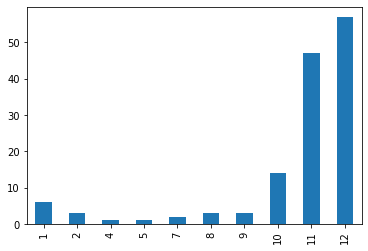

In [452]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

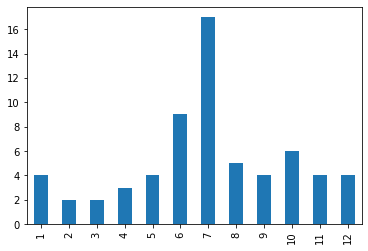

In [453]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

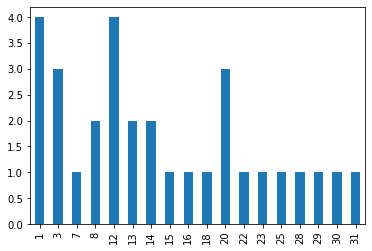

In [454]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.day.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [455]:
#print(movies_Reeves.head())
#print(release_dates.head())
df_Reeves = movies_Reeves.merge(release_dates[release_dates.country == 'USA'], \
on=['title','year']).sort_values(by='date')
print(df_Reeves)

                                title  year          name   type  \
46                         Youngblood  1986  Keanu Reeves  actor   
25                       River's Edge  1986  Keanu Reeves  actor   
41                   The Night Before  1988  Keanu Reeves  actor   
23                   Permanent Record  1988  Keanu Reeves  actor   
4    Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
7                  Dangerous Liaisons  1988  Keanu Reeves  actor   
22                         Parenthood  1989  Keanu Reeves  actor   
13                I Love You to Death  1990  Keanu Reeves  actor   
45                Tune in Tomorrow...  1990  Keanu Reeves  actor   
24                        Point Break  1991  Keanu Reeves  actor   
3          Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
8                             Dracula  1992  Keanu Reeves  actor   
21             Much Ado About Nothing  1993  Keanu Reeves  actor   
9         Even Cowgirls Get the Blues  1993  Kea

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

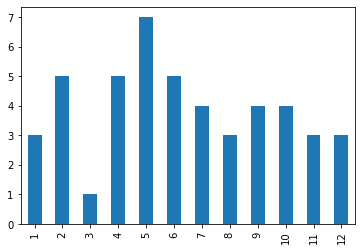

In [456]:
df_Reeves.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

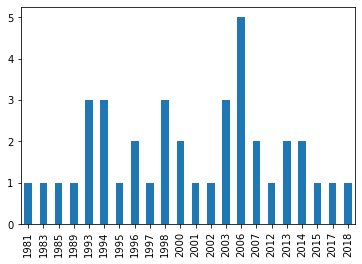

In [457]:

movies_McKellen = cast[cast.name.str.fullmatch('Ian McKellen', case=False)].sort_values(by="year")
df_McKellen = movies_McKellen.merge(release_dates[release_dates.country == 'USA'], \
    on=['title','year']).sort_values(by='date')
df_McKellen.date.dt.year.value_counts().sort_index().plot(kind='bar')